# Статистический анализ данных

#### Описание проекта

Aналитикy популярного сервиса аренды самокатов GoFast передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо  проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки

* абонентская плата отсутствует;

      стоимость одной минуты поездки — 8 рублей;

      стоимость старта (начала поездки) — 50 рублей;


* с подпиской Ultra

      абонентская плата — 199 рублей в месяц;

      стоимость одной минуты поездки — 6 рублей;

      стоимость старта — бесплатно.

##### Описание данных


В основных данных есть информация о пользователях, их поездках и подписках.

 * Tаблица Пользователи* — users_go.csv

*user_id* 	уникальный идентификатор пользователя

*name*	имя пользователя

*age* 	возраст

*city*	город

*subscription_type*	тип подписки (free, ultra)


* Tаблица Поездки* — rides_go.csv



*user_id*	уникальный идентификатор пользователя

*distance*	расстояние, которое пользователь проехал в текущей сессии (в метрах)

*duration*	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

*date*	дата совершения поездки

 * Tаблица Подписки*— subscriptions_go.csv


*subscription_type*	тип подписки

*minute_price*	стоимость одной минуты поездки по данной подписке

*start_ride_price*	стоимость начала поездки

*subscription_fee*	стоимость ежемесячного платежа


##### Шаг 1. Загрузка данных

1.1 Считайте CSV-файлы с данными с помощью библиотеки Pandas и сохраните их в датафреймы. Пути к файлам:


*/datasets/users_go.csv*

*/datasets/rides_go.csv*

*/datasets/subscriptions_go.csv*

1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

##### Шаг 2. Предобработка данных


2.1 Приведите столбец date к типу даты Pandas.

2.2 Создайте новый столбец с номером месяца на основе столбца date.

2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.


##### Шаг 3. Исследовательский анализ данных


Опишите и визуализируйте общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

3.2 соотношение пользователей с подпиской и без подписки;

3.3 возраст пользователей;

3.4 расстояние, которое пользователь преодолел за одну поездку;

3.5 продолжительность поездок.

##### Шаг 4. Объединение данных


4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;

с данными о пользователях с подпиской.

4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Шаг 5. Подсчёт выручки


5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3, 25.5 и 26.0 должны быть преобразованы к 26.

##### Подсказка

Продолжительность каждой поездки должна быть округлена с помощью метода «потолок» библиотеки numpy — *np.ceil():*

import numpy as np

 каждое значение из столбца duration округляется с помощью «потолка»: 
 
rides_df['duration'] = np.ceil(rides_df['duration']) 

*Помесячная выручка считается по формуле:* (стоимость старта поездки × количество поездок) + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

##### Шаг 6. Проверка гипотез


Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import plotly.express as px
import seaborn as sns
from IPython.display import display_html
import numpy as np
from scipy import stats as st
import os
from pymystem3 import Mystem
m = Mystem()


pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)



In [2]:
# Прочитаем файлы

users = pd.read_csv("/datasets/users_go.csv", sep=",")
rides = pd.read_csv("//datasets/rides_go.csv", sep=",")
subscriptions = pd.read_csv("//datasets/subscriptions_go.csv", sep=",")    


Напишем функцию для первичного ознакомления с датасетом:


In [3]:
def dataset_info(dataset_preview): 
    print(dataset_preview.info())
    display(dataset_preview.head())

In [4]:
for i in [users, rides, subscriptions]:
    print('    DATA PREVIEW     ')
    print()
    dataset_info(i)
    print()

    DATA PREVIEW     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



    DATA PREVIEW     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28



    DATA PREVIEW     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


*ВЫВОД:* Почти все столбцы заполнены. 

Надо будет поменять типы на DataTime, где присутствуют даты, и некоторуе числовые данные поменять на int. 


#### Шаг 2. Предобработка данных

In [5]:
#функция для вывода состава столбцов

def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)




In [6]:

#функция для вывода пустых значений и их доли в столбцах датафрейма

def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df


In [7]:
#функция для вывода информации о файле

def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())
            

Рассмотрим все 3 таблицы по очереди. Начнем с Rides

##### Rides

In [8]:
# Общая инфрмация:

df_info(rides)

Количество строк файла: 18068

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
user_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,1534
distance,"[4409.919140196136, 2617.5921534552563, 754.15...",float64,18068
duration,"[25.59976897198896, 15.816871452122792, 6.2321...",float64,17974
date,"[2021-01-01, 2021-01-18, 2021-04-20, 2021-08-1...",object,364



Информация о пропусках данных:


,column_name,num_missing,percent_missing
user_id,user_id,0,0.00
distance,distance,0,0.00
duration,duration,0,0.00
date,date,0,0.00



Первые пять строк таблицы:


,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


In [9]:
# проверим данные на логические ошибки:

rides.describe()

,user_id,distance,duration
count,18068.00,18068.00,18068.00
mean,842.87,3070.66,17.81
std,434.73,1116.83,6.09
min,1.00,0.86,0.50
25%,487.00,2543.23,13.60
50%,889.00,3133.61,17.68
75%,1213.25,3776.22,21.72
max,1534.00,7211.01,40.82


Файл содержит 18068 строк, пропуски отсутствуют.

Необходимые изменения:

     необходимо заменить формат столбца date с object на datetime

In [10]:

rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date'].describe()



count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

In [11]:
# Добавляем столбец месяца

rides['month'] = pd.DatetimeIndex(rides['date']).month


In [12]:
# посмотрим, что получилось

display(rides['date'].sample(4))
display(rides.head(4))
print(rides['date'].describe())

8459    2021-04-25
1503    2021-01-05
7978    2021-07-04
13125   2021-11-05
Name: date, dtype: datetime64[ns]

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object


Данные предоставлены за период с 01.01.2021 по 12.30.2021

Формат даты поменяли, в столбце duration секунды округлим до минут позже. Все остальные данные в порядке.


##### Users

In [13]:
# Общая инфрмация:

df_info(users)

Количество строк файла: 1565

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
user_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,1534
age,"[22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 2...",int64,29
name,"[Кира, Станислав, Алексей, Константин, Адель, ...",object,194
city,"[Тюмень, Омск, Москва, Ростов-на-Дону, Краснод...",object,8
subscription_type,"[ultra, free]",object,2



Информация о пропусках данных:


,column_name,num_missing,percent_missing
user_id,user_id,0,0.00
name,name,0,0.00
age,age,0,0.00
city,city,0,0.00
subscription_type,subscription_type,0,0.00



Первые пять строк таблицы:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Рассмотрим каждый столбец по отдельности


###### City

In [14]:
display(users['city'])
users['city'].describe()

0               Тюмень
1                 Омск
2               Москва
3       Ростов-на-Дону
4                 Омск
             ...      
1560         Пятигорск
1561              Сочи
1562         Краснодар
1563            Тюмень
1564    Ростов-на-Дону
Name: city, Length: 1565, dtype: object

count          1565
unique            8
top       Пятигорск
freq            226
Name: city, dtype: object

1565 записей, как и должно быть.
Проверим на уникальность и нет ли дубликатов - одних и тех же городов, но записанных по разному (например отличаются высотой букв).

In [15]:
sorted(users['city'].unique())

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

ВЫВОД: дубликатов нет. Столбец корректен.

In [16]:
users['city'].value_counts()

Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64

###### Age

In [17]:
# Общая инфрмация:

users['age'].describe()

count   1565.00
mean      24.92
std        4.55
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64

Вывод: Столбец вполне корректен


###### User_id

В этом столбце важно проверить, чтобы не было дубликатов, так как user_id - уникальный ключ, также посмотрим разброс значений (все ли четырехзначные - однотипные)

Напишем функцию id_check для проверки столбца с id абонента, так как такой столбец встретится еще не раз.

In [18]:
def id (id_check): 
    print(id_check.value_counts())
    print()
    print(id_check.describe())
    print()
    print('Уникальных значений =',len(id_check.unique()))
    
id(users['user_id'])

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

count   1565.00
mean     762.63
std      443.26
min        1.00
25%      378.00
50%      762.00
75%     1146.00
max     1534.00
Name: user_id, dtype: float64

Уникальных значений = 1534


In [19]:
users=users.drop_duplicates().reset_index(drop=True)

In [20]:
users.duplicated().sum()


0

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


Дупликатов тоже нет. Идем дальше


###### Subscription_type

In [22]:
#*Здесь проверим значение. Должно быть 2 тарифа.*

users['subscription_type'].value_counts()


free     835
ultra    699
Name: subscription_type, dtype: int64

ВЫВОД: Итого 1534 записей. Столбец корректен.


##### Subscriptions

In [23]:
# Общая инфрмация:

df_info(subscriptions)

Количество строк файла: 2

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
minute_price,"[8, 6]",int64,2
start_ride_price,"[50, 0]",int64,2
subscription_fee,"[0, 199]",int64,2
subscription_type,"[free, ultra]",object,2



Информация о пропусках данных:


,column_name,num_missing,percent_missing
subscription_type,subscription_type,0,0.00
minute_price,minute_price,0,0.00
start_ride_price,start_ride_price,0,0.00
subscription_fee,subscription_fee,0,0.00



Первые пять строк таблицы:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


ВЫВОД: Хорошая таблица - маленькая и корректная!



Еще раз проверяем все на наличие дубликатов:


In [24]:
# Cписок файлов для проверки:
files = [users, rides, subscriptions]

# цикл для проверки наличия дубликатов по списку files:
for name in files:
    print(f'Количество дубликатов: {name.duplicated().sum()} штук')
        

Количество дубликатов: 0 штук
Количество дубликатов: 0 штук
Количество дубликатов: 0 штук


##### Вывод по предобработке

По большей части данные изначально в хорошем состоянии. Изменены типы в столбцах с датами на datetime64, и проверена корректность данных. Дубликатов нет. Таблицы корректны.


Данные готовы для анализа.

#### Шаг 3. Исследовательский анализ данных

Для более глубокого анализа данных рассчитаем следующие параметры:

-  частота встречаемости городов;

- соотношение пользователей с подпиской и без подписки;

- возраст пользователей;

- расстояние, которое пользователь преодолел за одну поездку;

- продолжительность поездок.

##### частота встречаемости городов

Рассмотрим распределение пользователей по городу проживания

In [25]:

users['city'].value_counts()
    

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

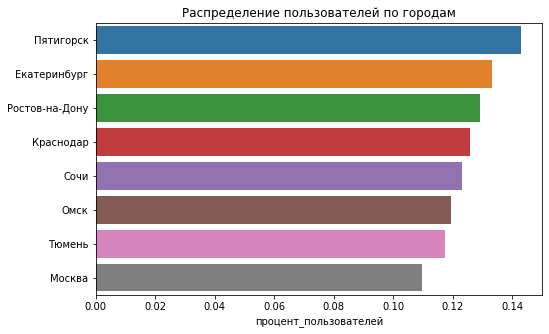

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(y=users['city'].value_counts(normalize=True).index, x=users['city'].value_counts(normalize=True))
plt.title('Pаспределение пользователей по городaм')
plt.xlabel('процент_пользователей')
plt.show()

Сервис представлeн в 8 городах. Чаще всего им пользуются в Пятигорске и Екатеринбургe- 219 и 204 раз, а меньше всего в Москве, всего 168 раз.



##### Cоотношение пользователей с подпиской и без подписки

In [27]:
users['ultra_users']=users.loc[users.loc[:, 'subscription_type'] == 'ultra']['subscription_type']
users['ultra_users'].count()



699

In [28]:
users['free_users']=users.loc[users.loc[:, 'subscription_type'] == 'free']['subscription_type']
users['free_users'].count()

835

 Визуализируем для наглядности:


<AxesSubplot:ylabel='subscription_type'>

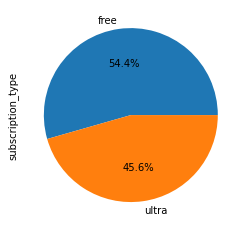

In [29]:

users['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%')

Подпиской Ultra пользуются 699 пользователей, а без подписки 835 человек использовали сервис за наблюдаемый период.

#####  Возраст пользователей

In [30]:
users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

In [31]:
users['age'].describe()

count   1534.00
mean      24.90
std        4.57
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64

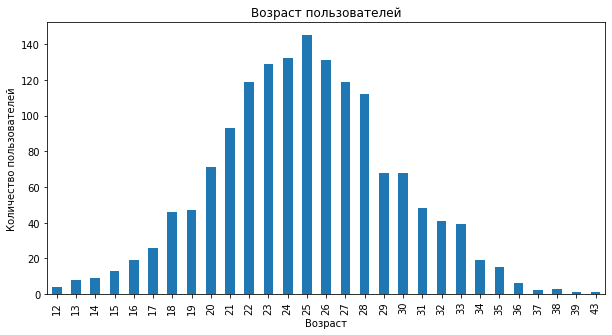

In [32]:
users['age'].value_counts().sort_index().plot(kind='bar', figsize = (10,5))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-success">

**Артём:** 👍 Хорошая визуализация, добавь еще подпись осей.

</div>

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Динара:**  Сделано

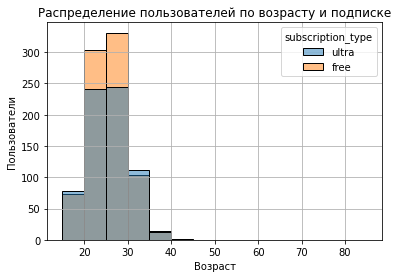

In [33]:
sns.histplot(users, x='age', hue='subscription_type', bins=14, binrange=(15,85))
plt.title('Распределение пользователей по возрасту и подписке')
plt.xlabel('Возраст')
plt.ylabel('Пользователи')
plt.grid()

In [34]:
users.groupby('age').count()

,user_id,name,city,subscription_type,ultra_users,free_users
age,,,,,,
12,4,4,4,4,3,1
13,8,8,8,8,4,4
14,9,9,9,9,4,5
15,13,13,13,13,9,4
16,19,19,19,19,8,11
17,26,26,26,26,13,13
18,46,46,46,46,19,27
19,47,47,47,47,29,18
20,71,71,71,71,34,37


Большая часть пользователей представлена в возрасте 20-30 лет, выбросов в данных нет. Чаще всего арендуют самокаты молодые люди 25 лет - 145 человек. Cовсем редко арендуют самокат несовершонолетние и люди в возрасте +40.  Разброс значений возраста с и без подписки также представлен без выбросов. 


##### Pасстояние

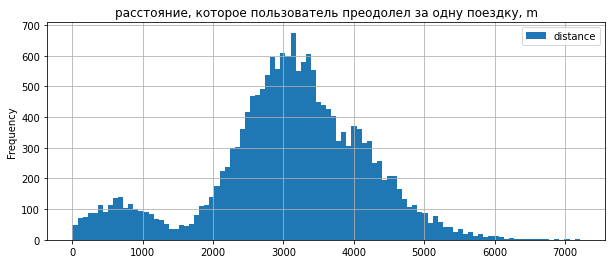

In [35]:
rides.plot(kind='hist', title='расстояние, которое пользователь преодолел за одну поездку, m', y='distance', \
                  bins=100, grid=True, figsize=(10,4) )
plt.show()


Удалим значения меньше 500 метров, вероятно пользователи передумали пользоваться сервисом незамедлительно после аренды, и посмотрим на значения еще раз:



In [36]:
rides_df = rides.loc[(rides['distance'] >= 500)]


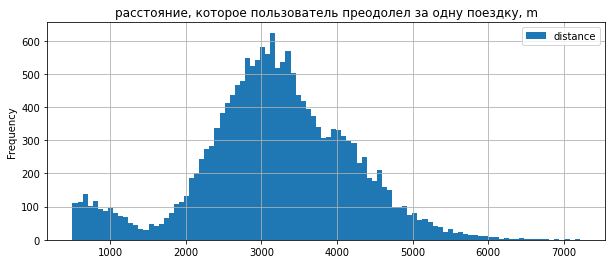

In [37]:
rides_df.plot(kind='hist', title='расстояние, которое пользователь преодолел за одну поездку, m', y='distance', \
                  bins=100, grid=True, figsize=(10,4) )
plt.show()

Подавляющее большинство арендуют самокаты для поездок около 3100 метров


##### Продолжительность поездок

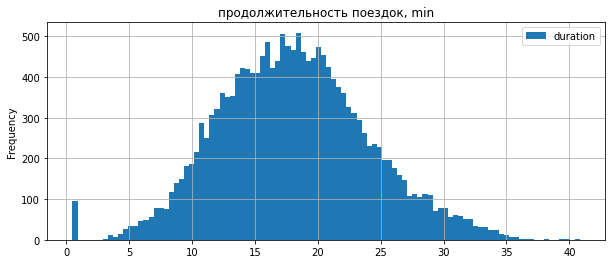

In [38]:
rides_df.plot(kind='hist', title='продолжительность поездок, min', y='duration', \
                  bins=100, grid=True, figsize=(10,4) )
plt.show()

Удалим поездки меньше 1 минуты, и, посмотрим что получилось



In [39]:
rides_df = rides.loc[(rides['duration'] >= 0.59)]
rides_df.describe()

,user_id,distance,duration,month
count,17973.00,17973.00,17973.00,17973.00
mean,841.55,3059.86,17.90,6.49
std,435.14,1108.81,5.98,3.44
min,1.00,0.86,2.04,1.00
25%,484.00,2538.84,13.67,4.00
50%,887.00,3129.03,17.71,6.00
75%,1213.00,3762.64,21.75,9.00
max,1534.00,7066.00,40.82,12.00


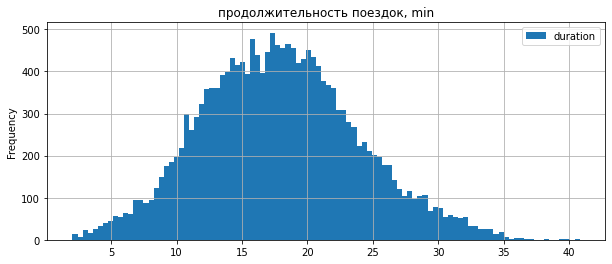

In [40]:
rides_df.plot(kind='hist', title='продолжительность поездок, min', y='duration', \
                  bins=100, grid=True, figsize=(10,4) )
plt.show()

Половина пользователей используют самокаты около 18 минут на расстоянии 3 км, eсть и те, кто ездил на самокате больше 40 минут на длительное расстояние.

Oкруглим в большую сторону все значения столбца и поменяем тип на int.*

In [41]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
rides_df['duration'] = np.ceil(rides_df['duration']).astype(int)

rides_df


,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.10,20,2021-11-04,11
18064,1534,2840.42,22,2021-11-16,11
18065,1534,3826.19,19,2021-11-18,11
18066,1534,2902.31,17,2021-11-27,11


#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

- c данными о пользователях без подписки;

- с данными о пользователях с подпиской.

4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Merge

In [42]:
data = users.merge(rides_df,on='user_id',how='right')
all_df = data.merge(subscriptions,on='subscription_type',how='left')
 

In [43]:
all_df.head()

,user_id,name,age,city,subscription_type,ultra_users,free_users,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,ultra,NaN,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,ultra,NaN,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,ultra,NaN,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,ultra,NaN,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,ultra,NaN,4028.69,27,2021-08-28,8,6,0,199


In [44]:
print('Количество строк до объеденения', rides_df.shape[0])
print('Количество строк после объеденения', all_df.shape[0])

Количество строк до объеденения 17973
Количество строк после объеденения 17973


##### два датафрейма

Поделим датафрейм all_data, в котором мы объединили сводные таблицы по поездкам, пользователям и подпискам, на два в зависимости от подписки:



In [45]:
ultra_users = all_df.query('subscription_type == "ultra"')
free_users = all_df.query('subscription_type == "free"')
ultra_users.info()
print()
free_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   ultra_users        6500 non-null   object        
 6   free_users         0 non-null      object        
 7   distance           6500 non-null   float64       
 8   duration           6500 non-null   int64         
 9   date               6500 non-null   datetime64[ns]
 10  month              6500 non-null   int64         
 11  minute_price       6500 non-null   int64         
 12  start_ride_price   6500 non-null   int64         
 13  subscription_fee   6500 non-null   int64         
dtypes: datet

Удалим лишние столбцы в обоих таблицах:


In [46]:

ultra_users.drop('subscription_type', axis=1, inplace=True)
ultra_users.drop('free_users', axis=1, inplace=True)
ultra_users


,user_id,name,age,city,ultra_users,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16,2021-10-17,10,6,0,199


In [47]:

free_users.drop('subscription_type', axis=1, inplace=True)
free_users.drop('ultra_users', axis=1, inplace=True)
free_users


,user_id,name,age,city,free_users,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

Cовместим на графике информацию о пользователях с подпиской и без для наглядности, также посмотрим на гистограммах частоту распределения пользователей по объему использования услуг

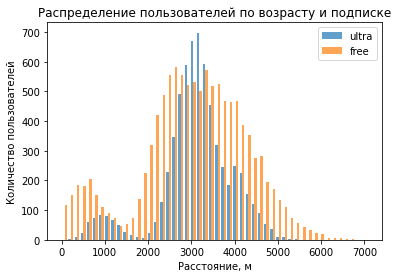

In [48]:

x1=ultra_users['distance']
x2=free_users['distance']

names=['ultra', 'free']
plt.hist([x1,x2], bins=50, alpha=0.7, label=names)
plt.title('Распределение пользователей по возрасту и подписке')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.legend()

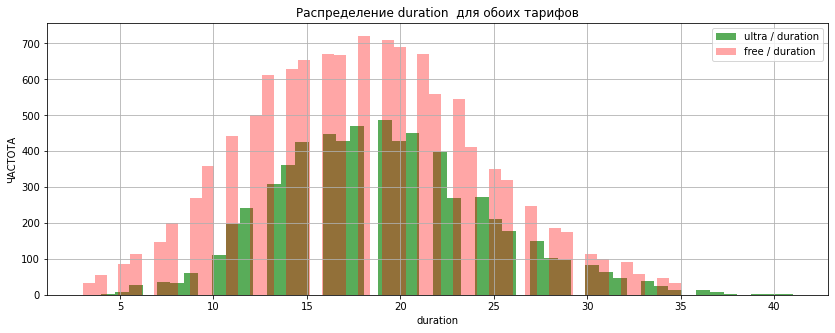

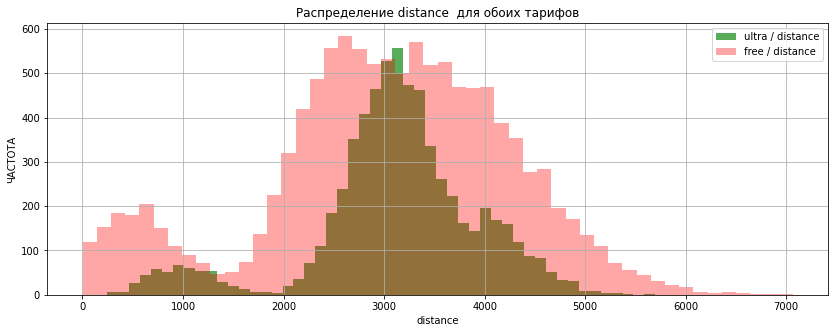

In [49]:
for param in ['duration', 'distance']:
    b = 50
    plt.figure(figsize=(14, 5))
    
    plt.hist(all_df.loc[all_df['subscription_type'] == "ultra", param], label='ultra / '+param, color='g', alpha=0.65, bins = b)
    plt.hist(all_df.loc[all_df['subscription_type'] == "free", param], label='free / '+param, color='r', alpha=0.35, bins = b)
    
    plt.ylabel('ЧАСТОТА')
    plt.xlabel(param)
    plt.grid()
    plt.title(f'Распределение {param}  для обоих тарифов')
    plt.legend()
    plt.show();

Без подписки ездят на длительные расстояния чаще , а с подпиской на расстояние около 3000 метров. Также можно заметить медианные значения располагаются посередине и относительно равномерное распределение в зависмости от количества пользователей.



##### Вывод

Объединили таблицы поездки, пользователи, подписки. 

Поделили датайфрейм на две части в зависимости от наличия или отсутствия подписки. Нам эти данные понадобятся в дальнейшем для более глубокого анализа поведения пользователей. Для наглядности продемонстрировали информацию на гистограммах по поведению пользователей сервиса с подпиской и без.

Исследование показало, что большинство пользователей с подпикой Ультра предпочитают поездки до 3 км, но сервисом все же пользуются без подписки большинство






#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

    
    
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность поездки в каждой строке датафрейма при подсчёте стоимости округляется до следующего целого числа: например, значения 


In [50]:
users.groupby('subscription_type')['user_id'].count()

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

Поссмотрим на суммарное расстояние, количество и длительность поездок для каждого пользователя за каждыи месяц отдельно с подпиской и без.


##### суммарное расстояние для каждого пользователя за каждый месяц

In [51]:
# для пользователей с подпиской:

ultra_users['month'] = ultra_users['date'].dt.month

ultra_users_pivot= (ultra_users.pivot_table(index=['user_id', 'month'],
                    values=['distance', 'date'],
                    aggfunc={'date':'count','distance':'sum'}))
ultra_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
ultra_users_pivot.reset_index(inplace=True)
ultra_users_pivot




,user_id,month,count_date,distance
0,1,1,2,7027.51
1,1,4,1,754.16
2,1,8,2,6723.47
3,1,10,2,5809.91
4,1,11,3,7003.50
...,...,...,...,...
4528,699,6,1,4072.80
4529,699,8,2,7018.32
4530,699,9,2,6364.86
4531,699,10,1,4707.85


In [52]:
# для пользователей без подписки:

free_users['month'] = free_users['date'].dt.month

free_users_pivot= (free_users.pivot_table(index=['user_id', 'month'],
                    values=['distance', 'date'],
                    aggfunc={'date':'count','distance':'sum'}))
free_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
free_users_pivot.reset_index(inplace=True)
free_users_pivot



,user_id,month,count_date,distance
0,700,1,1,2515.69
1,700,2,5,13446.66
2,700,3,1,3798.33
3,700,4,1,2984.55
4,700,6,2,5927.65
...,...,...,...,...
6762,1534,6,2,3409.47
6763,1534,8,2,7622.45
6764,1534,9,1,4928.17
6765,1534,11,4,13350.02


##### количество поездок  для каждого пользователя за каждый месяц

In [53]:
# для пользователей с подпиской:

ultra_users_pivot= (ultra_users.pivot_table(index=['user_id', 'month'],
                    #values=['user_id', 'date'],
                    aggfunc={'date':'count'}))
ultra_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
ultra_users_pivot.reset_index(inplace=True)
ultra_users_pivot.head(10)


,user_id,month,count_date
0,1,1,2
1,1,4,1
2,1,8,2
3,1,10,2
4,1,11,3
5,1,12,2
6,2,3,3
7,2,4,2
8,2,6,1
9,2,7,2


In [54]:
# для пользователей без подписки:

free_users_pivot= (free_users.pivot_table(index=['user_id', 'month'],
                    #values=['user_id', 'date'],
                    aggfunc={'date':'count'}))
free_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
free_users_pivot.reset_index(inplace=True)
free_users_pivot.head(10)

,user_id,month,count_date
0,700,1,1
1,700,2,5
2,700,3,1
3,700,4,1
4,700,6,2
5,700,7,2
6,700,8,1
7,700,10,2
8,700,11,3
9,701,1,1


##### суммарное время для каждого пользователя за каждый месяц

In [55]:
# для пользователей с подпиской:

ultra_users_pivot= (ultra_users.pivot_table(index=['user_id', 'month'],
                    values=['duration', 'date'],
                    aggfunc={'date':'count','duration':'sum'}))
ultra_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
ultra_users_pivot.reset_index(inplace=True)
ultra_users_pivot.head(10)




,user_id,month,count_date,duration
0,1,1,2,42
1,1,4,1,7
2,1,8,2,46
3,1,10,2,32
4,1,11,3,56
5,1,12,2,28
6,2,3,3,63
7,2,4,2,40
8,2,6,1,14
9,2,7,2,48


In [56]:
# для пользователей без подписки:

free_users_pivot= (free_users.pivot_table(index=['user_id', 'month'],
                    values=['duration', 'date'],
                    aggfunc={'date':'count','duration':'sum'}))
free_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
free_users_pivot.reset_index(inplace=True)
free_users_pivot.head(10)


,user_id,month,count_date,duration
0,700,1,1,15
1,700,2,5,89
2,700,3,1,19
3,700,4,1,16
4,700,6,2,29
5,700,7,2,21
6,700,8,1,17
7,700,10,2,44
8,700,11,3,32
9,701,1,1,18


Посмотрим на цифры для пользователей самокатов с подпиской и без подписки:


In [57]:
ultra_users_pivot.describe()

,user_id,month,count_date,duration
count,4533.00,4533.00,4533.00,4533.00
mean,347.77,6.43,1.43,27.30
std,200.43,3.42,0.70,14.71
min,1.00,1.00,1.00,4.00
25%,174.00,3.00,1.00,17.00
50%,348.00,6.00,1.00,23.00
75%,523.00,9.00,2.00,35.00
max,699.00,12.00,6.00,126.00


In [58]:
free_users_pivot.describe()

,user_id,month,count_date,duration
count,6767.00,6767.00,6767.00,6767.00
mean,1120.08,6.51,1.70,30.57
std,240.45,3.46,0.89,17.81
min,700.00,1.00,1.00,3.00
25%,915.00,4.00,1.00,18.00
50%,1120.00,7.00,1.00,26.00
75%,1326.00,9.00,2.00,40.00
max,1534.00,12.00,7.00,143.00


Пользователи без подписки используют самокат в среднем на 3 минуты дольше
, чем пользователи с подпиской. Только четверть всех пользователей предпочли использование самокатов два и более раза.


In [59]:
ultra_users.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.00,6500.00,6500.00,6500.00,6500.00,6500.00,6500.00,6500.00
mean,348.73,24.89,3115.45,19.04,6.42,6.00,0.00,199.00
std,201.10,4.76,836.90,5.58,3.41,0.00,0.00,0.00
min,1.00,12.00,244.21,4.00,1.00,6.00,0.00,199.00
25%,175.00,22.00,2785.44,15.00,4.00,6.00,0.00,199.00
50%,351.00,25.00,3148.64,19.00,6.00,6.00,0.00,199.00
75%,525.00,28.00,3560.57,22.00,9.00,6.00,0.00,199.00
max,699.00,38.00,5699.77,41.00,12.00,6.00,0.00,199.00


Среднее расстояние, которое проезжают клиенты с подпиской равно 3115 метров, длительность 19 минут,  a средний возраст 25 лет.



#####  Помесячная выручка


Pассчитаем суммарную выручку с каждого пользователя за каждый месяц и cоздадим таблицу с агрегированными данными о поездках на основе полученных ранее данных:




In [60]:
all_data_pivot = (all_df.pivot_table(index=['user_id',  'name', 'age', 'city',  'subscription_type', 'month'],
                  values= ['distance', 'duration'], 
                  aggfunc={ 'month':'count', 'distance':'sum','duration':'sum' }))
all_data_pivot.rename(columns={'month':'total_rides_during_month', 'duration':'total_duration', 'distance':'total_distance', 'subscription_type':'subscription'}, inplace=True)
all_data_pivot.reset_index(inplace=True)
all_data_pivot.head()


,user_id,name,age,city,subscription_type,month,total_distance,total_duration,total_rides_during_month
0,1,Кира,22,Тюмень,ultra,1,7027.51,42,2
1,1,Кира,22,Тюмень,ultra,4,754.16,7,1
2,1,Кира,22,Тюмень,ultra,8,6723.47,46,2
3,1,Кира,22,Тюмень,ultra,10,5809.91,32,2
4,1,Кира,22,Тюмень,ultra,11,7003.50,56,3


In [61]:
#all_data_pivot['total_duration'] = round(all_df['total_duration'], 0)

def profit(row):
    total_distance = row['total_distance']
    total_duration = row['total_duration']
    total_distance = row['total_distance']
    subscription_type = row['subscription_type']
    total_rides_during_month = row['total_rides_during_month']
    if subscription_type == 'ultra':
        return total_duration * 6 + 199
    
    if subscription_type == 'free':
        return     (50* total_rides_during_month) +8* total_duration
all_data_pivot['profit'] = all_data_pivot.apply(profit, axis=1)

all_data_pivot


# 6= minute_price_ultra
# 199= subscription_fee

#8= minute_price_free
#50= start_ride_price_free
#(50* total_rides_during_month)+8* total_duration

,user_id,name,age,city,subscription_type,month,total_distance,total_duration,total_rides_during_month,profit
0,1,Кира,22,Тюмень,ultra,1,7027.51,42,2,451
1,1,Кира,22,Тюмень,ultra,4,754.16,7,1,241
2,1,Кира,22,Тюмень,ultra,8,6723.47,46,2,475
3,1,Кира,22,Тюмень,ultra,10,5809.91,32,2,391
4,1,Кира,22,Тюмень,ultra,11,7003.50,56,3,535
...,...,...,...,...,...,...,...,...,...,...
11295,1534,Альберт,25,Краснодар,free,6,3409.47,26,2,308
11296,1534,Альберт,25,Краснодар,free,8,7622.45,48,2,484
11297,1534,Альберт,25,Краснодар,free,9,4928.17,23,1,234
11298,1534,Альберт,25,Краснодар,free,11,13350.02,78,4,824


Посмотрим на месячные показатели по каждому параметру в отдельности:


In [62]:
all_df.pivot_table(index='subscription_type', columns='month', values='user_id', aggfunc='count')


month,1,2,3,4,5,6,7,8,9,10,11,12
subscription_type,,,,,,,,,,,,
free,992,860,972,948,955,983,948,970,996,942,915,992
ultra,584,468,561,551,597,565,574,540,515,529,492,524


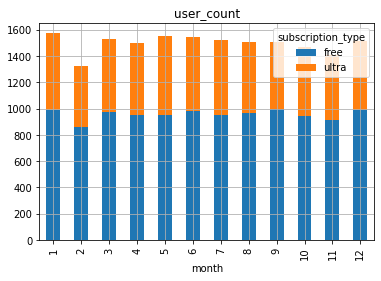

In [63]:
all_df.pivot_table(index='subscription_type', columns='month', values='user_id', aggfunc='count').T.plot(kind='bar', 
                                                                                                stacked=True, 
                                                                                                grid=True, 
                                                                                                title='user_count');

Выборка представляет собой 1534 пользователя, использовавших сервис по прокату самокатов в течении года, соответственно. Среди них 835 человек пользовались сервисом без подписки, и 699 с подпиской Ultra.

Распределение пользователей по месяцам относительно стабильное, и лишь в феврале пользователей немного меньше обычного



Визуализируем данные с учетом расчетов о выручке:


'total_duration'

,mean,std,var
subscription_type,,,
free,30.57,17.81,317.02
ultra,27.30,14.71,216.40


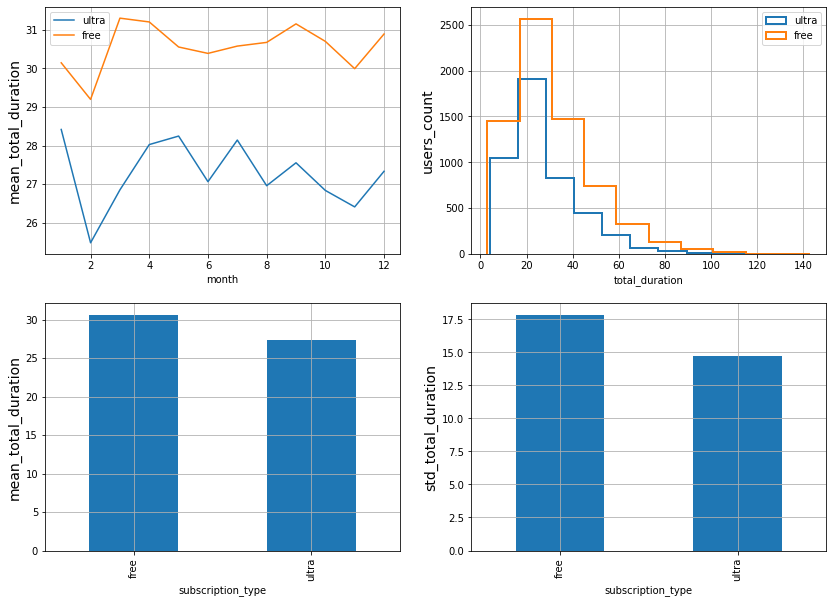

'total_distance'

,mean,std,var
subscription_type,,,
free,5134.41,3161.91,9997664.53
ultra,4467.33,2353.17,5537400.45


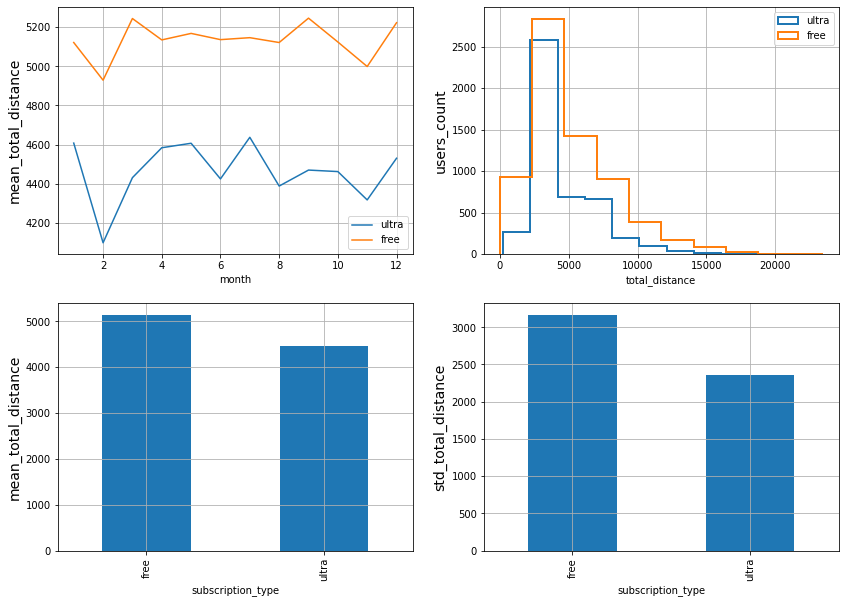

'user_id'

,mean,std,var
subscription_type,,,
free,1120.08,240.45,57817.90
ultra,347.77,200.43,40173.61


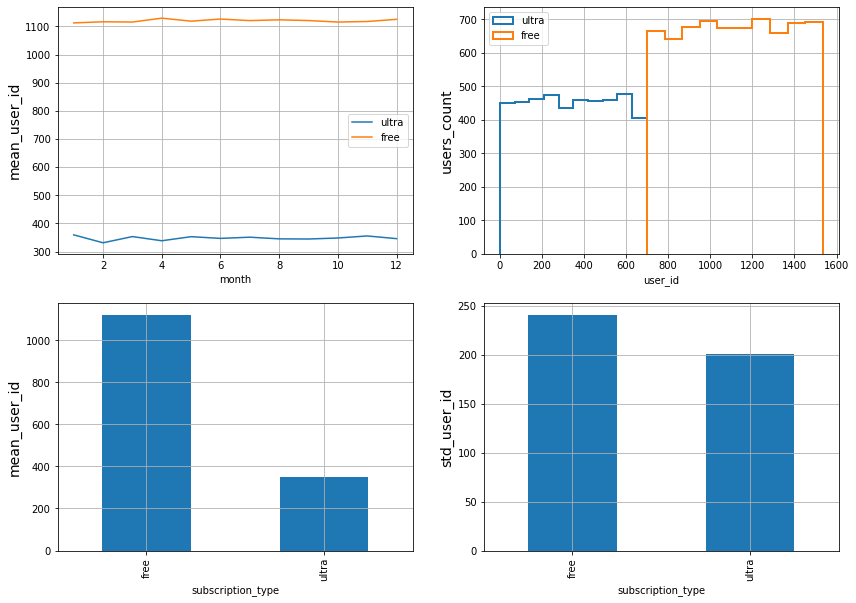

'profit'

,mean,std,var
subscription_type,,,
free,329.33,183.27,33587.31
ultra,362.79,88.26,7790.31


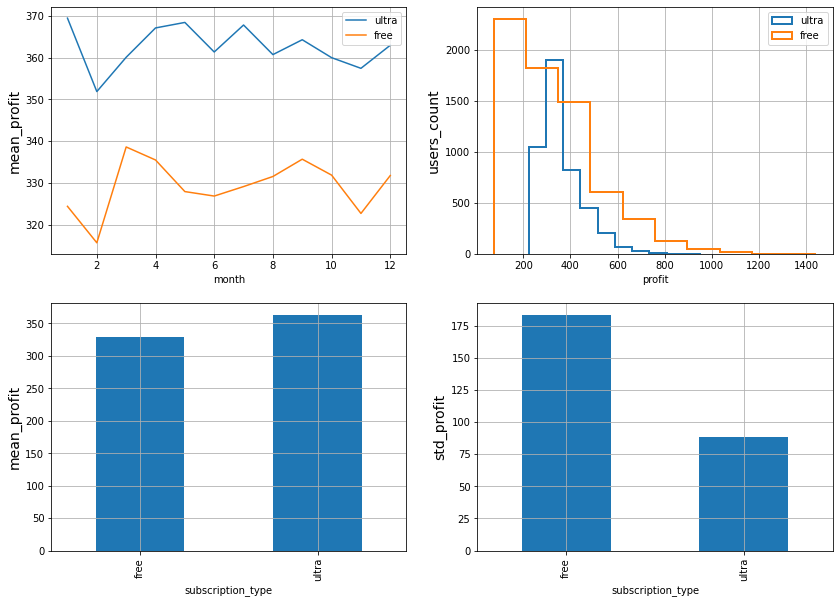

In [64]:
for i in ['total_duration', 'total_distance', 'user_id', 'profit']:
    df_month_mean = all_data_pivot.pivot_table(index='subscription_type', columns='month', values=i, aggfunc='mean')
       
    display(i)
    display(all_data_pivot.groupby('subscription_type')[i].agg(['mean', 'std', 'var']))
    
    plt.figure(figsize=(14,10))
    plt.subplot(2, 2, 1)
    plt.plot(df_month_mean.loc['ultra'], label='ultra')
    plt.plot(df_month_mean.loc['free'], label='free')
    plt.xlabel('month')
    plt.ylabel('mean_'+i, fontsize=14)
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 2)
    plt.hist(all_data_pivot[all_data_pivot['subscription_type'] == 'ultra'][i], histtype='step', label='ultra', lw=2)
    plt.hist(all_data_pivot[all_data_pivot['subscription_type'] == 'free'][i], histtype='step', label='free', lw=2)
    plt.xlabel(i)
    plt.ylabel('users_count', fontsize=14)
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 3)
    all_data_pivot.groupby('subscription_type')[i].mean().plot.bar()
    plt.ylabel('mean_'+i, fontsize=14)
    plt.grid()

    plt.subplot(2, 2, 4)
    all_data_pivot.groupby('subscription_type')[i].std().plot.bar()
    plt.ylabel('std_'+i, fontsize=14)
    plt.grid()

    plt.show()

По всем рассмотренным параметрам (суммарное расстояние, количество и длительность поездок для каждого пользователя за каждыи месяц отдельно с подпиской и без, общая выручка) наблюдается относительно равномерное потреблениe услуг в течение года 

Средние значения ежемесячного потребления услуг у пользователей без подписки выше, чем у пользователей Ultra.
Так, объемы выручки с подпиской несколько больше, может еще и потому, что именно пользователи без подписки предпочитают поездки в среднем на минуту короче и чуть более короткие расстояния. Дисперсии выборок по всем рассмотренным параметрам  выше у пользователей без подписки.  Cущественные различия в выручке можно объяснить высоким количеством пользователей (835 человек за весь рассматриваемый период) в сравнении с пользователями Ultra (699); стоимостью старта поездки (50 руб) для людей без подписки; и немного высокой поминутной оплатой (8 руб в сравнении с 6 руб для Ultra).


In [65]:
df_year = all_data_pivot.groupby('user_id').agg({'total_duration':'sum',
       'total_distance':'sum', 'profit':'sum', 'subscription_type':'first', 'age':'first', 'city':'first'})
df_year.head()

,total_duration,total_distance,profit,subscription_type,age,city
user_id,,,,,,
1,211,34070.18,2460,ultra,22,Тюмень
2,203,33964.06,2611,ultra,31,Омск
3,239,36907.60,2827,ultra,20,Москва
4,293,44837.19,2952,ultra,26,Ростов-на-Дону
5,180,35556.95,2672,ultra,28,Омск


In [66]:
df_year[df_year.columns[:-3]].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'sum']).round(1)


,total_duration,total_distance,profit
count,1534.00,1534.00,1534.00
mean,215.50,35850.70,2524.90
median,211.00,35258.00,2491.50
std,75.70,12941.80,740.10
min,35.00,5530.30,626.00
max,459.00,79325.80,5022.00
sum,330613.00,54994932.70,3873131.00


In [67]:
ultra_users_pivot= (ultra_users.pivot_table(index=['user_id', 'month'],
                    values=['duration', 'date'],
                    aggfunc={'date':'count','duration':'sum'}))
ultra_users_pivot.rename(columns={'date':'count_date'}, inplace=True)
ultra_users_pivot.reset_index(inplace=True)
ultra_users_pivot.head(10)


,user_id,month,count_date,duration
0,1,1,2,42
1,1,4,1,7
2,1,8,2,46
3,1,10,2,32
4,1,11,3,56
5,1,12,2,28
6,2,3,3,63
7,2,4,2,40
8,2,6,1,14
9,2,7,2,48


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### Первая гипотеза


Как было сказано выше, средняя выручка пользователей без подписки значительно выше, чем у клиентов Ultra. Проверим статистическую значимость данных отличий в зависимости от потраченного на поездки время.

Нулевая гипотеза: средняя длительность поездки пользователей c/без подписки равны.

Альтернативная гипотеза: средняя длительность поездки пользователей без подписки больше.

Гипотеза двухсторонняя, проверяем гипотезу о равенстве средних двух генеральных совокупностей. Выборки  различаются по размерам, их дисперсии также различаются. p-уровень примем соответсвущим высокому уровню статистической значимости (0,01).

In [68]:
sample_ultra = all_df[all_df['subscription_type'] == 'ultra']['duration']
sample_free = all_df[all_df['subscription_type'] == 'free']['duration']
results = st.ttest_ind(sample_ultra, sample_free,  alternative='greater',  equal_var = False) 


In [69]:
alpha = 0.05
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 3.086332092684639e-29. Отвергаем нулевую гипотезу


Результат теста показывает, что средняя длительность поездки пользователей с и без подписки равны. 
Предыдущие расчеты показали разницу в длительности поездок для пользователей c/без подписки,  тест следует повторить с большим разбросом данных, так как при всех прочих равных возможно небольшое различие в длительности поездок для обоих категорий пользователей.



##### Вторая гипотеза


 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза H0:μ >= 3130

Альтернативная гипотеза H1 μ < 3130

Проверяем  одностороннюю гипотезу:


In [70]:
ultra_users1 = ultra_users.pivot_table(index='user_id', values= 'distance' )

alpha = 0.05
optimal_value=3130 
alpha = 0.05
results = st.ttest_1samp(ultra_users1, optimal_value, alternative='less')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-значение: [0.07249587]
p-value = [0.07249587].Не получилось отвергнуть нулевую гипотезу


Полученный результат говорит о том, что тест надо провести еще раз на большую выборку, так как предварительный анализ и расчеты показали, что в среднем пользователи с подпиской прoезжают меньше 3130 м



##### Третья гипотеза


Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза H0: средняя выручка пользователей c/без подписки равны.

Альтернативная гипотеза H1:  средняя выручка пользователей с подпиской больше.

In [71]:
sample_ultra = all_data_pivot[all_data_pivot['subscription_type'] == 'ultra']
sample_free = all_data_pivot[all_data_pivot['subscription_type'] == 'free']


results = st.ttest_ind(sample_ultra['profit'],sample_free['profit'],  alternative='greater',  equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
 

p-значение: 2.4970242872858465e-38
Отвергаем нулевую гипотезу



Все верно, как показали предыдущие расчеты объемы выручки пользователей с подпиской несколько больше, нежели тех,  кто пользуется арендой самокатов без подписки.


##### Четвертая гипотеза


Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 

Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

Нужно рассмотреть одностороннюю гипотезу, где:
               
      нулевая гипотеза H0:μ= x_обращении;  
      
      aльтернативная H1:μ< x_обращении 

Нулевая гипотеза будет отвергнута в пользу альтернативной, если количество обращении, значимо меньше, чем x_обращении. Ecли количество обращений будет значимо больше мы не отвергнем нулевую гипотезу.


Для проверки гипотезы используем тест Стьюдента о равенстве двух независимых выборок:

   
    results = st.ttest_rel(before, after)
     

#### Вывод


Бoльшая часть данных изначально в хорошем состоянии. Поэтому в процессе предобработки данных изменены только типы в столбцах с датами на datetime64, и проверена корректность данных. Дубликатов не было.
-Была создана новая таблица, в которую сгруппировали данные по трем таблицам и расчеты по выручке

-Для удобства анализа пользователей с подпиской и без подписки выделили в 2 отдельные таблицы, и рассчитали по каждому из них длительность поездок, помесячное количество и время поездок.

В процессе анализа выявили:

    -больше всего клиентов у сервиса в Пятигорске и Екатеринбургe-(219 и 204);
    -больше половины пользователей, а именно 835 использовали сервис без подписки;
    -основная масса пользователей в возрасте от 22 до 28 лет;
    - чаще всего ездят на расстояния 2800- 3300 метров, причем это касается пользователей
      как с подпиской, так и без подписки;
    - по большей части самокатом пользуются в течении 13-22 минуты, a средне арифметическое время пользования все те же 18 минут.
    
    
Была создана таблица all_data в в которой были объеденены данные из трех таблиц; наличие или отсутствие подписки и выручка с каждого пользователя.


Дано разъяснение 1ой гипотезе и проверены 3 гипотезы:

В первой гипотезе было подтверждено утверждение, согласно которому средняя длительность поездок клиентов с подпиской выше, чем тех, кто ездит без подписки. Хотя, cогласно анализу предоставленных данных,  клиенты без подписки тратят в среднем 18 минут на поездки, а пользователи с подпиской 19 минут. 



Во втором статтестe мы проверяли достоверность односторонней гопотезы, результат которой показал, что
клиенты ездят на расстояния больше или равные 3130 метрам. Однако, при предвaрительном анализе данных было выявлено, что половина пользователей с подпиской предпочитают ездить на расстояния в среднем 3115 метров.

В третьем тесте проверили какие клиенты (с подпиской или без) приносят больший доход, исход, которого, показал, что  выручка от пользователей с подпиской чуть выше. Также, как и предварительные результаты анализa.


В итоге можно рекомендовать сервису продвигать свои услуги с подпиской. Это приносит больше выручки. Также стоит обратить внимание, что клиенты с подпиской воспользовались услугой лишь единожды, и только 25% из всех подписчиков 2 и более раза. 





















